In [22]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
ti = pd.read_csv('travel.insurance.csv')

In [24]:
ti.columns

Index(['Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Claim', 'Duration', 'Destination', 'Net Sales', 'Commision (in value)',
       'Gender', 'Age'],
      dtype='object')

In [25]:
ti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 11 columns):
Agency                  63326 non-null object
Agency Type             63326 non-null object
Distribution Channel    63326 non-null object
Product Name            63326 non-null object
Claim                   63326 non-null object
Duration                63326 non-null int64
Destination             63326 non-null object
Net Sales               63326 non-null float64
Commision (in value)    63326 non-null float64
Gender                  18219 non-null object
Age                     63326 non-null int64
dtypes: float64(2), int64(2), object(7)
memory usage: 5.3+ MB


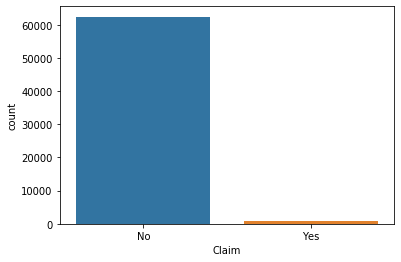

In [26]:
sns.countplot("Claim", data = ti)

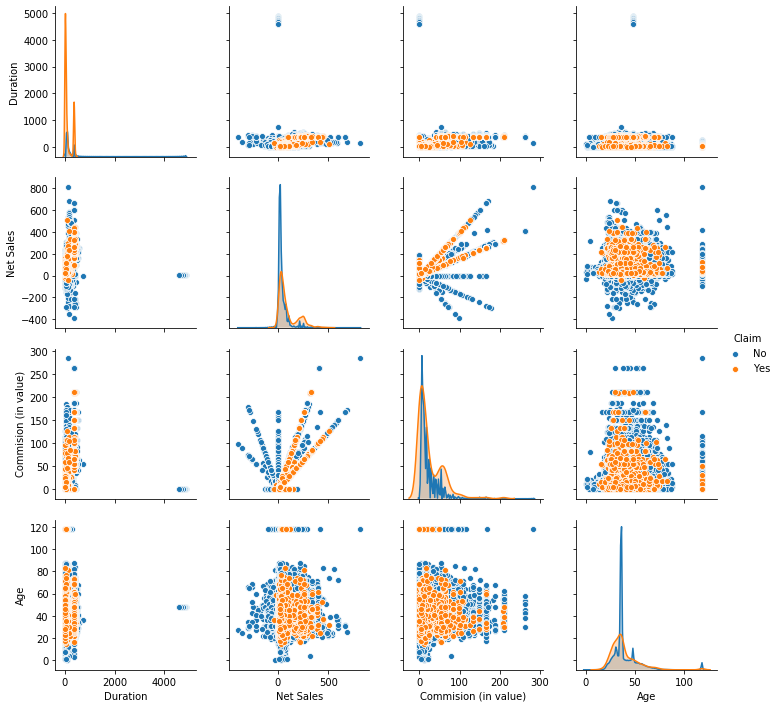

In [27]:
sns.pairplot(ti, hue="Claim")

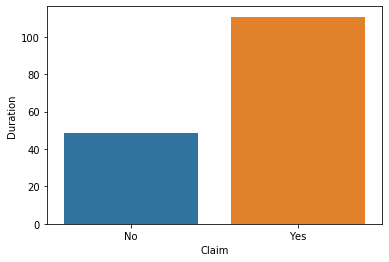

In [28]:
viz1 = sns.barplot(x="Claim", y="Duration", data=ti, ci=None)

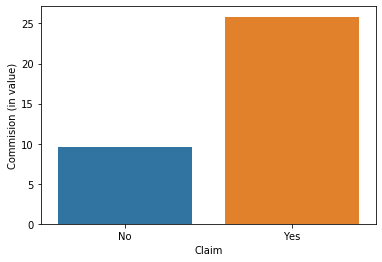

In [29]:
viz2 = sns.barplot(x="Claim", y="Commision (in value)", data=ti, ci=None)

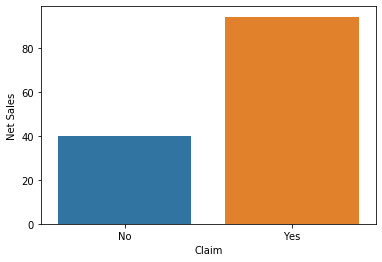

In [30]:
viz3 = sns.barplot(x="Claim", y="Net Sales", data=ti, ci=None)

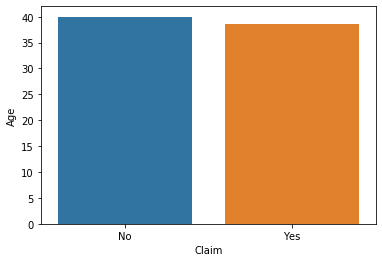

In [31]:
viz4 = sns.barplot(x="Claim", y="Age", data=ti, ci=None)

In [32]:
ti.drop(['Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Duration', 'Destination', 'Net Sales', 'Commision (in value)',
       'Gender'], axis=1,inplace= True) 

In [33]:
ti.columns

Index(['Claim', 'Age'], dtype='object')

In [34]:
ticlean= pd.get_dummies(ti)
ticlean.head()

,Age,Claim_No,Claim_Yes
0,81,1,0
1,71,1,0
2,32,1,0
3,32,1,0
4,41,1,0


In [35]:
from pandas import Series, DataFrame

In [36]:
bins = range(0,100,5)

age_groups = ticlean.groupby(pd.cut((ticlean).Age, bins))


In [37]:
age_effects = age_groups.Claim_No.mean()

In [38]:
age_effects

Age
(0, 5]      1.000000
(5, 10]     1.000000
(10, 15]    0.977778
(15, 20]    0.972752
(20, 25]    0.974883
(25, 30]    0.970022
(30, 35]    0.981302
(35, 40]    0.991356
(40, 45]    0.981971
(45, 50]    0.987457
(50, 55]    0.984626
(55, 60]    0.985677
(60, 65]    0.984638
(65, 70]    0.982864
(70, 75]    0.969620
(75, 80]    0.986928
(80, 85]    0.977011
(85, 90]    1.000000
(90, 95]         NaN
Name: Claim_No, dtype: float64

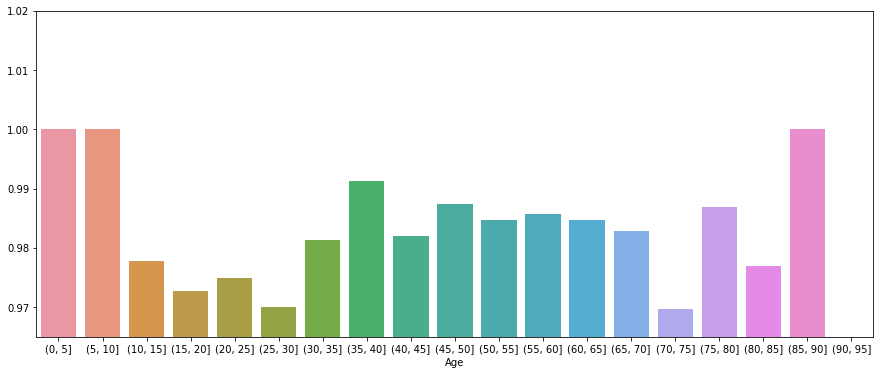

In [57]:
plt.figure(figsize=(15, 6))

plt.axis([0, 80, 0.965, 1.02])

viz5 = sns.barplot(x=age_effects.index, y=age_effects.values, ci=None)